## Programming Lab #2
## Foundations of Machine Learning
## Group 11 (Eva, Elizabeth, Anika, Anjali)

The purpose of this project is to build predictive algorithms that predict the likelihood a person has a stroke. The data include:
  
  - `age`: Patient age, numeric
  - `avg_glucose_level`: Blood sugar levels, numeric
  - `bmi`: Body mass index, numeric
  - `ever_married`: Ever married, dummy/character (Yes, No)
  - `gender`: Male, Female, or Other, character
  - `heart_disease`: Has heart disease, dummy
  - `hypertension`: Has hypertension, dummy
  - `id`: Study identification number
  - `Residence_type`: Type of residence, dummy/character (Urban, Rural)
  - `smoking_status`: Former, never, or current smoker, categorical
  - `work_type`: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (`Private`), Self-employed (`Self-employed`)
  - `stroke`: Suffered a stroke in the sample period
 

## Summary

   In this project, we were tasked to use the provided training and testing data sets in order to build predictive algorithms that can predict the likelihood that a person has a stroke. Given that a simple linear model with some polynomials and dummy variables achieves an R^2 value of .087 and an RMSE of .206, our goal was to find a model with better R^2 and RMSE values, focusing on finding the lowest RMSE value possible. First, the 12 provided variables had to be cleaned and wrangled accordingly. Variables such as "smoking_status" was cleaned by making the nulls as "smokes" as we came to concluison of assuming that people who did not fill it out probably did not wan to anser that they smoke as it is shamed upon now a days. Variables like "id", "Residence_type", "age", "stroke", "ever_married", and "work_type" were deemed clean as they had no nulls or outliers, while "age" exhibited a wide numerical range. The variable "avg_glucose_level" showed a non-normal distribution with two peaks. Binary variables like "heart_disease" and "hypertension" were checked for missing values but none were found. Missing values were chosen to be removed if they appeared very infrequently throughout the variables. For example, "bmi" had <5% missing values, which were removed as it was numeric data as well. "gender" also had one value that set as "other" and not male or female that we removed. Exploratory data analysis included creating cross tables and graphs that were used to compare the variables’ distributions to the “stroke” variable since that was the dependent variable. These distributions were used to choose adequate categorical and numerical variables that had the most correlation with the stroke variable. The chosen numerical variables were 'age', 'hypertension', 'heart_disease', 'bmi', and 'avg_glucose_level'. The chosen categorical variables were 'work_type', 'Residence_type', 'smoking_status', and 'ever_married'. Next, the cleaned training and testing data frames were used to create several linear, decision tree, and k nearest neighbor models using various combinations of the extracted categorical and numerical data. Then, the R^2 and RMSE values for each model were calculated and displayed in order to determine the best predictive model for determining if a person has a stroke. Based on the output, the linear model that utilized numerical and categorical data was the best, with an R^2 value of 0.08350736729418795 and an RMSE value of 0.18473242291682238. 


## Data 

The data for this project comes from training_data.csv, which is then used to build models and the data for testing the models comes from a provided dataset called testing_data.csv. 


First, we analyzed the different variables and determined what we needed to clean/wrangle. The variables we looked into are described in the chart below. We did an exploratory analysis of the data using the different variables and columns to clean and analyze the data. We also explored any missing values and decided how best to deal with that. 

Looking at the overall data we determined the max number of values for the testing data was 1023 and for the training data was max of 4087. This gives an idea of how many values should be present for each variable. We looked at each variable for the test and train data sets and used the same way to clean or look at each data set, so everything was unified. First we started by looking at the ‘smoking_status’ variable and for this variable we had two options to clean it: either removing the nulls or making the unknown values as smokers. WWe tried many of our different types of models of using either the "smoking_status" variable cleaned through removing the nulls or making the unknown values as smokers. Our data was significantly better when we set the unknowns as smokers as without we had negative R^2 values for many models. Our assumption is why we decided to make the unknown values set to ‘smoker’ as we assumed that people who smoked might have not wanted to input that fact into the data as it is looked down upon. 

For our EDA for each variable we created a cross table with the stroke variable to see any obviously evident correlations. 
Next we looked at cleaning the id variable, the Residence_type, and the work_type variables. These seemed to be clean already as there were no null values (all variables had maximum amount of values) and there were no outliers, so there was nothing to clean with these variables. Through looking at the cross tab with stroke we came to a few conclusions, for work_types the values of self-employed may have slightly higher stroke rates and for residence_type that the  Urban areas may have slightly higher stroke rates. These relations showed that they will be a good variable to use in our models. This is done through calculating the percentage of each value to each category.
Next, we looked at the age variable. There were no null values or outliers, all the values were numeric values ranging from 0 to 82. We mapped this distribution and it produced a wide range of ages covered. Through looking at the histogram with stroke, we were able to see that people older in age had more strokes, showing this will be a good variable to use in our models. 
The next variable we examined was the avg_glucose_level variable. This variable was also generally clean as it had no nulls or outliers. When we looked at the distribution for this it did not have a normal distribution. Interestingly, the graph showed two distinct peaks, albeit one peak was far more pronounced than one another. We tried all of our models including avg_glucose_level and not including it as we were unsure if the peaks would make the data worse, but found better results with our R^2 and RMSE values with the variable included. 
We continued this process with the bmi variable. We found missing values in this, but since the nans only made up less than 5% of the sample, we removed the nans and the values are numeric so it would be hard to replace them. The distribution of this variable looked more normal. We compared how the distribution looked before and after the removal of the nans, and the distribution did not seem affected. It also appears that the BMI levels from 21-40 led to more strokes again showing that we should use this variable in our model. 

The cleaning of the binary variables (heart_disease, hypertension, and ever_married) involved checking the missing values, wherein none of these variables had any, and viewing their cross table with the stroke variable.  We saw that with heart_disese variable, "yes" to heart disease had a strong correlation with stroke, meaning it will be a good indicator. We saw that with the hypertension variable, "yes" to hypertension had a strong correlation with stroke, meaning it will be a good indicator as well. When we looked at the marriage variable it showed that marriage status would affect stroke levels too, so again we should include it in our models. Looking at the gender variable, there was only one issue: one of the values in train and test was "other" and since it was such a small portion of the data, we decided to remove the value. The cross tab did not lead us into any direction of assumption of stroke based on make or female due to this we did not include gender in our model. Finally we looked at the stroke and it had no nulls or any outliers.


## Setting up environment

In [1]:
# Initalizing a print function to limit repetition

def pn(x):
    print(x, '\n')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv('./data/training_data.csv')
df_test = pd.read_csv('./data/testing_data.csv')
pn(df_train.head()) # view the dataframe

gdf_train = pd.DataFrame.copy(df_train) # make df that we can edit
gdf_test = pd.DataFrame.copy(df_test) # make df that we can edit

# Look at some stats
pn(gdf_train.describe())  #see that bmi is the one missing values
pn(gdf_test.describe()) #see that bmi is the one missing values

   Unnamed: 0     id  gender   age  hypertension  heart_disease ever_married  \
0        2465  68685    Male  36.0             0              0          Yes   
1        4311  59058  Female  45.0             0              0          Yes   
2        2375  46068    Male  58.0             0              0           No   
3        5017  36837  Female  61.0             0              0          Yes   
4         753  30550  Female  78.0             0              0           No   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0       Govt_job          Urban              65.87  32.2  formerly smoked   
1       Govt_job          Rural              68.66  25.3     never smoked   
2  Self-employed          Rural             170.93  30.7          Unknown   
3  Self-employed          Urban              69.88  27.1     never smoked   
4        Private          Urban             103.86  30.6          Unknown   

   stroke  
0       0  
1       0  
2       0  
3       

## Data wrangling and EDA

In [3]:
## cleaning smoking_status var:
var = 'smoking_status'
pn(gdf_train[var].value_counts()) #1241 unknown values for smoking status of train, which is 30% of data 
pn(gdf_test[var].value_counts()) #303 unknown values for smoking status of test

never smoked       1505
Unknown            1241
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64 

never smoked       387
Unknown            303
formerly smoked    186
smokes             147
Name: smoking_status, dtype: int64 



In [4]:
# gdf_train[var] = gdf_train[var].replace('Unknown', np.nan)
# gdf_test[var] = gdf_test[var].replace('Unknown', np.nan)
# gdf_train[var+'_NA'] = gdf_train[var].isnull()
# gdf_test[var+'_NA'] = gdf_test[var].isnull()
# print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # confirms checks for NAs
# print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # confirms checks for NAs 

In [5]:
# # Removing missing values
# gdf_train= gdf_train.dropna(subset=[var])
# pn(gdf_train[var].describe()) # looks like the stats did not change
# print('Total Missings After Drop: \n', sum(gdf_train[var].isnull()),'\n') # checks to see if drop was successful
# gdf_test= gdf_test.dropna(subset=[var])
# pn(gdf_test[var].describe()) # looks like the stats did not change
# print('Total Missings After Drop: \n', sum(gdf_test[var].isnull()),'\n') # checks to see if drop was successful

In [6]:
# we decided to change unknowns to smokes based on an inference that being unwilling to admit smoking status likely means the person was a smoker
gdf_train[var] = gdf_train[var].replace('Unknown', 'smokes')
gdf_test[var] = gdf_test[var].replace('Unknown', 'smokes')
pn(gdf_train[var].value_counts())
pn(gdf_test[var].value_counts())

smokes             1883
never smoked       1505
formerly smoked     699
Name: smoking_status, dtype: int64 

smokes             450
never smoked       387
formerly smoked    186
Name: smoking_status, dtype: int64 



In [7]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') #cant assume anything with the stroke, but appears that former smokers are more likely to have a stroke by a little
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') #cant assume anything with the stroke 

stroke              0   1
smoking_status           
formerly smoked   645  54
never smoked     1434  71
smokes           1809  74 

stroke             0   1
smoking_status          
formerly smoked  170  16
never smoked     368  19
smokes           435  15 



In [8]:
## cleaning id var:

missing_values_train = gdf_train['id'].isnull().sum()
missing_values_test = gdf_test['id'].isnull().sum()

# print the number of missing values
print(f"Number of missing values in training set 'id' column: {missing_values_train}")
print(f"Number of missing values in training set 'id' column: {missing_values_test}")

# Check for duplicated id values
duplicated_ids_train = gdf_train.duplicated('id').sum()
duplicated_ids_test = gdf_test.duplicated('id').sum()

# If there are any duplicated IDs, 'duplicated_ids' will contain those rows
print(f"\nduplicated IDs found in training set: {duplicated_ids_train}" )
print(f"duplicated IDs found in testing set: {duplicated_ids_train}")

# id values seem clean

Number of missing values in training set 'id' column: 0
Number of missing values in training set 'id' column: 0

duplicated IDs found in training set: 0
duplicated IDs found in testing set: 0


In [9]:
## cleaning Residence_type var:

# print unique variables
print("Unique Residence_type values in training set:", gdf_train["Residence_type"].unique())
print("Unique Residence_type values in testing set:", gdf_test["Residence_type"].unique())

# Check for nans
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # confirms checks for NAs
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # confirms checks for NAs 

# Residence_type var already seems clean

Unique Residence_type values in training set: ['Urban' 'Rural']
Unique Residence_type values in testing set: ['Urban' 'Rural']
Total Missings: 
 0 

Total Missings: 
 0 



In [10]:
print(pd.crosstab(gdf_train["Residence_type"],gdf_train['stroke']),'\n') # Urban areas may have slightly higher stroke rates
print(pd.crosstab(gdf_test["Residence_type"],gdf_test['stroke']),'\n') 

stroke             0    1
Residence_type           
Rural           1941   94
Urban           1947  105 

stroke            0   1
Residence_type         
Rural           459  20
Urban           514  30 



In [11]:
## cleaning work_type var:

var = 'work_type'
print(gdf_train[var].value_counts()) #no unknowns, they add up to 4087
print(gdf_test[var].value_counts()) #no unknowns, adds up to 1023
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # confirms checks for NAs
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # confirms checks for NAs 
# no need to clean anything

Private          2329
Self-employed     667
children          542
Govt_job          534
Never_worked       15
Name: work_type, dtype: int64
Private          596
Self-employed    152
children         145
Govt_job         123
Never_worked       7
Name: work_type, dtype: int64
Total Missings: 
 0 

Total Missings: 
 0 



In [12]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Self-employed may have slightly higher stroke rates
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke            0    1
work_type               
Govt_job        506   28
Never_worked     15    0
Private        2210  119
Self-employed   617   50
children        540    2 

stroke           0   1
work_type             
Govt_job       118   5
Never_worked     7   0
Private        566  30
Self-employed  137  15
children       145   0 



In [13]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Self-employed may have slightly higher stroke rates
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke            0    1
work_type               
Govt_job        506   28
Never_worked     15    0
Private        2210  119
Self-employed   617   50
children        540    2 

stroke           0   1
work_type             
Govt_job       118   5
Never_worked     7   0
Private        566  30
Self-employed  137  15
children       145   0 



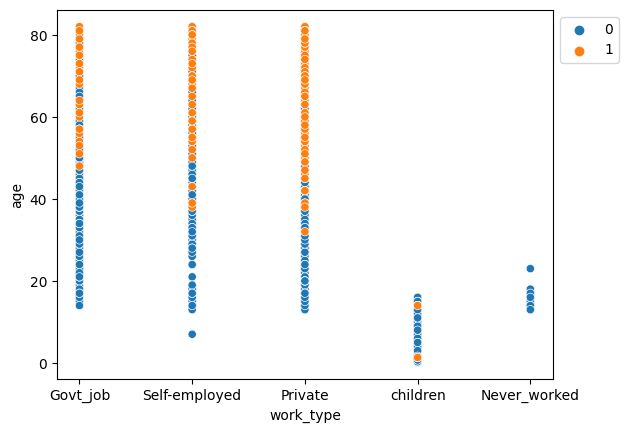

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

this_plot = sns.scatterplot(data=gdf_train,x='work_type',y='age',hue='stroke') # Plot the fake data
this_plot.legend(loc= "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

count    4087.000000
mean       43.324169
std        22.531019
min         0.080000
25%        26.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64 

count    1023.000000
mean       42.836872
std        22.942857
min         0.160000
25%        24.000000
50%        44.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64 

Total Missings: 
 0 

Total Missings: 
 0 



<Axes: >

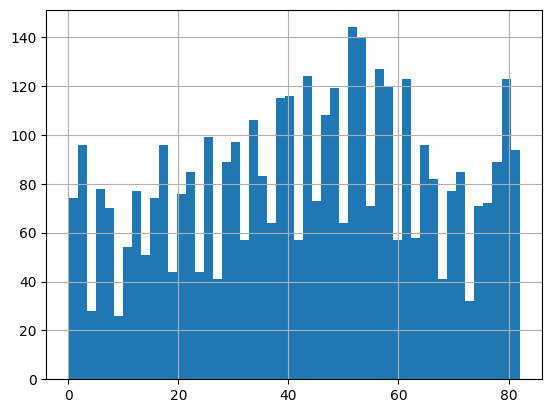

In [15]:
## cleaning age var:
var = 'age'

# Exploring missing values
pn(gdf_train[var].describe()) # looks good, numeric, ages range from 0 to 82
pn(gdf_test[var].describe()) # looks good, numeric, ages range from 0 to 82
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # confirms checks for NAs
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # confirms checks for NAs 
# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at age distribution in sample
gdf_train[var].hist(bins=50)

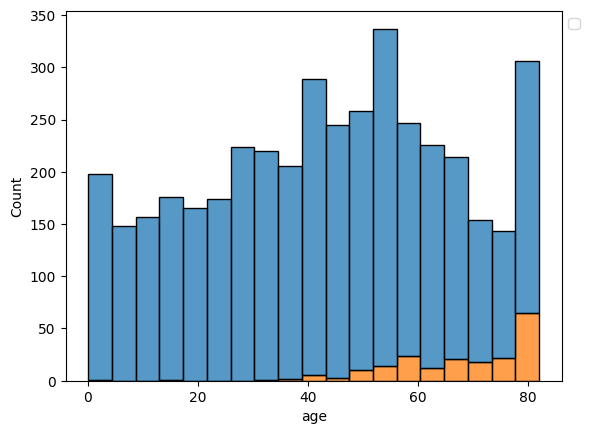

In [16]:
this_plot1 = sns.histplot(data=gdf_train, x='age', hue='stroke', multiple='stack', stat='count')  # Plot the fake data
handles, labels = this_plot1.get_legend_handles_labels()
this_plot1.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.05, 1))  # Move legend off the plot canvas

plt.show()
#shows older ages, more likely to get a stroke 

count    4087.000000
mean      106.010396
std        45.047912
min        55.120000
25%        77.295000
50%        92.000000
75%       113.845000
max       271.740000
Name: avg_glucose_level, dtype: float64 

count    1023.000000
mean      106.696129
std        46.231319
min        55.250000
25%        76.775000
50%        90.970000
75%       114.955000
max       263.560000
Name: avg_glucose_level, dtype: float64 

Total Missings: 
 0 

Total Missings: 
 0 



<Axes: >

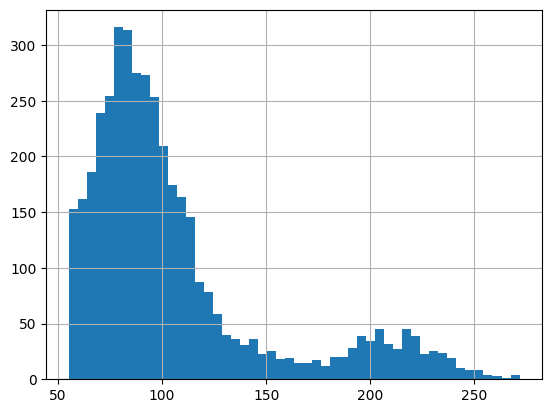

In [17]:
## cleaning avg_glucose_level var:
var = 'avg_glucose_level'

# Exploring missing values
pn(gdf_train[var].describe()) # count looks right
pn(gdf_test[var].describe()) # count looks right
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # confirms checks for NAs
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # confirms checks for NAs 
# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at average glucose level distribution in sample
gdf_train[var].hist(bins=50) # interesting how there seems to be two probability peaks

In [18]:
bins = [50, 75, 100, 125, 150,175,200,225,250,275,300]
labels = ['50-75', '76-100', '101-125', '126-150','151-175','176-200','201-225','226-250','251-275','276-300']
gdf_train['glucose_group'] = pd.cut(gdf_train[var], bins=bins, labels=labels)
cross_tab = pd.crosstab(gdf_train['glucose_group'], gdf_train['stroke'])
print(cross_tab)

gdf_test['glucose_group'] = pd.cut(gdf_test[var], bins=bins, labels=labels)
cross_tab = pd.crosstab(gdf_test['glucose_group'], gdf_test['stroke'])
print(cross_tab)

stroke            0   1
glucose_group          
50-75           858  35
76-100         1551  55
101-125         768  27
126-150         203   9
151-175          96   8
176-200         120  20
201-225         180  28
226-250          95  14
251-275          17   3
stroke           0   1
glucose_group         
50-75          210  12
76-100         400  10
101-125        174  10
126-150         57   1
151-175         22   1
176-200         24   5
201-225         56   6
226-250         27   3
251-275          3   2


count    3928.000000
mean       28.923371
std         7.843083
min        10.300000
25%        23.600000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64 

Total Missings: 
 159 

count    981.000000
mean      28.772579
std        7.900756
min       11.500000
25%       23.300000
50%       27.900000
75%       32.900000
max       64.800000
Name: bmi, dtype: float64 

Total Missings: 
 42 

Axes(0.125,0.11;0.775x0.77)


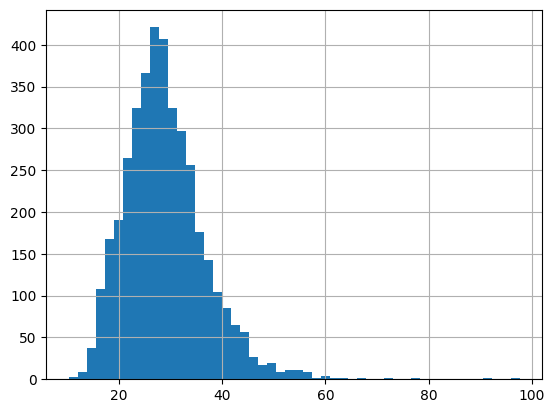

In [19]:
## cleaning bmi var:
var = 'bmi'

# Exploring mising values
pn(gdf_train[var].describe()) # some are missing
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # checks for number of NAs, about 3.9% of sample
pn(gdf_test[var].describe()) # some are missing
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # checks for number of NAs, about 3.8% of sample
# Because the missing values make up less than 5% of the samples, the nans will be removed

# Take a look at bmi distribution in sample
print(gdf_train[var].hist(bins=50))

count    3928.000000
mean       28.923371
std         7.843083
min        10.300000
25%        23.600000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64 

Total Missings After Drop: 
 0 

count    981.000000
mean      28.772579
std        7.900756
min       11.500000
25%       23.300000
50%       27.900000
75%       32.900000
max       64.800000
Name: bmi, dtype: float64 

Total Missings After Drop: 
 0 

Axes(0.125,0.11;0.775x0.77)


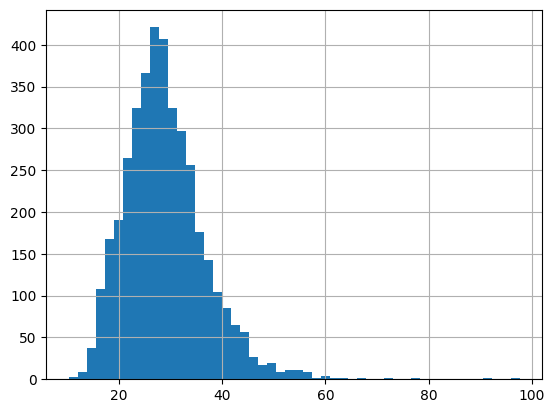

In [20]:
# Removing missing values
gdf_train= gdf_train.dropna(subset=[var])
pn(gdf_train[var].describe()) # looks like the stats did not change
print('Total Missings After Drop: \n', sum(gdf_train[var].isnull()),'\n') # checks to see if drop was successful
gdf_test= gdf_test.dropna(subset=[var])
pn(gdf_test[var].describe()) # looks like the stats did not change
print('Total Missings After Drop: \n', sum(gdf_test[var].isnull()),'\n') # checks to see if drop was successful

# Take a look at bmi distribution in sample
print(gdf_train[var].hist(bins=50)) # doesn't look like distribution was effected by droped observations

In [21]:
bins = [0, 10, 20, 30, 40,50,60,70]
labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70']
gdf_train['bmi_group'] = pd.cut(gdf_train[var], bins=bins, labels=labels)
cross_tab = pd.crosstab(gdf_train['bmi_group'], gdf_train['stroke'])
print(cross_tab)

bins = [0, 10, 20, 30, 40,50,60,70]
labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70']
gdf_test['bmi_group'] = pd.cut(gdf_test[var], bins=bins, labels=labels)
cross_tab = pd.crosstab(gdf_test['bmi_group'], gdf_test['stroke'])
print(cross_tab)

stroke        0   1
bmi_group          
11-20       417   3
21-30      1902  89
31-40      1133  64
41-50       245  15
51-60        48   0
61-70         8   0
stroke       0   1
bmi_group         
11-20      117   0
21-30      467  21
31-40      274  14
41-50       67   2
51-60       17   1
61-70        1   0


Training Set:
count    3928.000000
mean        0.051171
std         0.220375
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64
Total Missings: 
 0 

Test Set:
count    981.000000
mean       0.042813
std        0.202540
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: heart_disease, dtype: float64
Total Missings: 
 0 



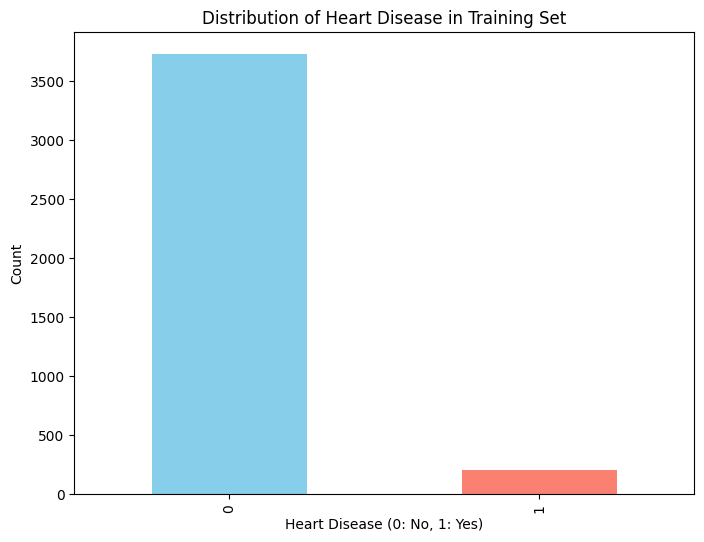

In [22]:
## cleaning heart_disease var:

var = 'heart_disease'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at the distribution of heart_disease
plt.figure(figsize=(8, 6))
gdf_train[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Heart Disease in Training Set')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [23]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Heart disease seems to have a strong correlation with stroke compared to other variables, will be a good indicator
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke            0    1
heart_disease           
0              3590  137
1               167   34 

stroke           0   1
heart_disease         
0              907  32
1               36   6 



Training Set:
count    3928.000000
mean        0.093432
std         0.291074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64
Total Missings: 
 0 

Test Set:
count    981.000000
mean       0.085627
std        0.279955
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: hypertension, dtype: float64
Total Missings: 
 0 



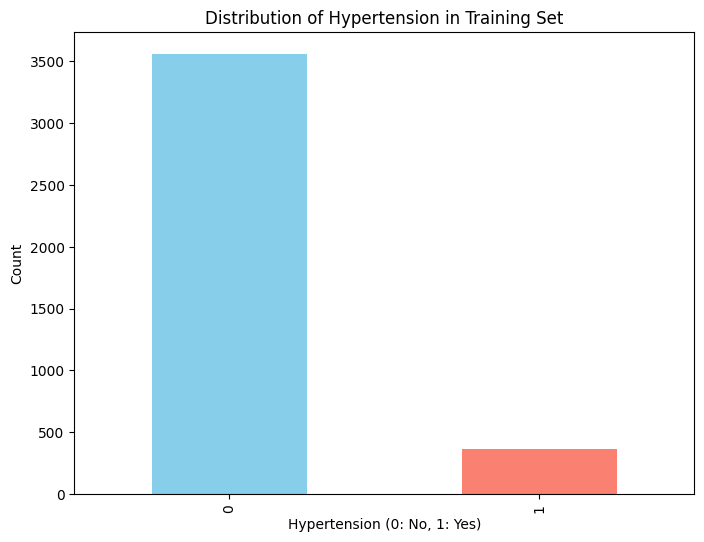

In [24]:
## cleaning hypertension var:

var = 'hypertension'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at the distribution of heart_disease
plt.figure(figsize=(8, 6))
gdf_train[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Hypertension in Training Set')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [25]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Hypertension seems to have a strong correlation with stroke compared to other variables, will be a good indicator
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke           0    1
hypertension           
0             3440  121
1              317   50 

stroke          0   1
hypertension         
0             869  28
1              74  10 



Training Set:
count       3928
unique         3
top       Female
freq        2317
Name: gender, dtype: object
Female    2317
Male      1610
Other        1
Name: gender, dtype: int64
Female    2317
Male      1610
Name: gender, dtype: int64
Total Missings: 
 0 

Test Set:
count        981
unique         2
top       Female
freq         580
Name: gender, dtype: object
Female    580
Male      401
Name: gender, dtype: int64
Total Missings: 
 0 



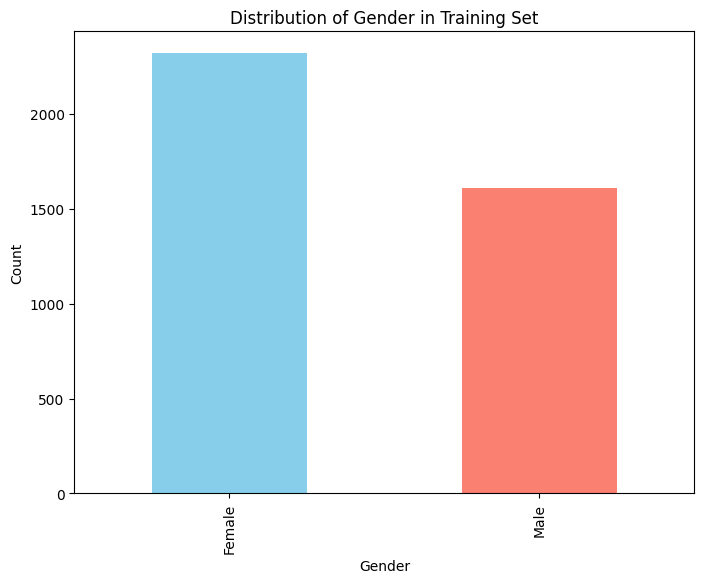

In [26]:
## cleaning gender var:

var = 'gender'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print(gdf_train[var].value_counts()) #need to remove other
gdf_train = gdf_train[gdf_train[var] != 'Other'] #removes value other
print(gdf_train[var].value_counts())

print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right, notice, there are onlu two unique values, so will have to manually enter Other in one hot encoding
print(gdf_test[var].value_counts())  # count looks right
gdf_test = gdf_test[gdf_test[var] != 'Other']

print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at the distribution of heart_disease
plt.figure(figsize=(8, 6))
gdf_train[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Gender in Training Set')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [27]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Can't conclude anything
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke     0   1
gender          
Female  2220  97
Male    1536  74 

stroke    0   1
gender         
Female  557  23
Male    386  15 



Training Set:
count     3927
unique       2
top        Yes
freq      2568
Name: ever_married, dtype: object
Total Missings: 
 0 

Test Set:
count     981
unique      2
top       Yes
freq      636
Name: ever_married, dtype: object
Total Missings: 
 0 



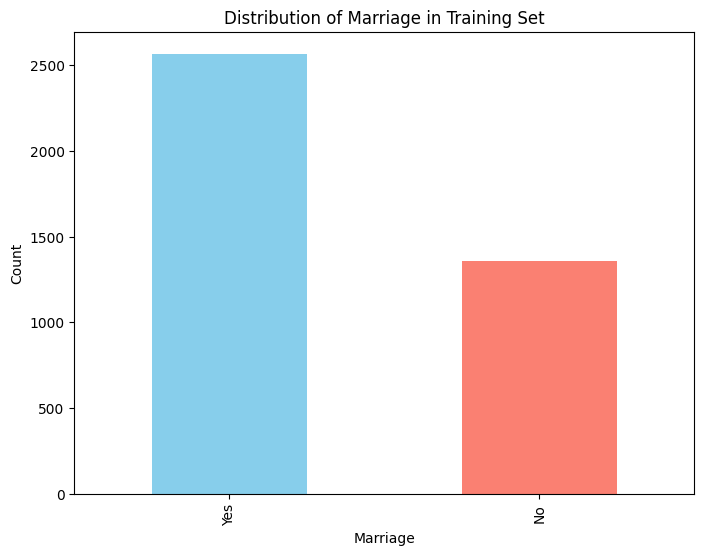

In [28]:
## cleaning ever_married var:

var = 'ever_married'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at the distribution of heart_disease
plt.figure(figsize=(8, 6))
gdf_train[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Marriage in Training Set')
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.show()

In [29]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Marriage does seem to affect stroke rates
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke           0    1
ever_married           
No            1337   22
Yes           2419  149 

stroke          0   1
ever_married         
No            344   1
Yes           599  37 



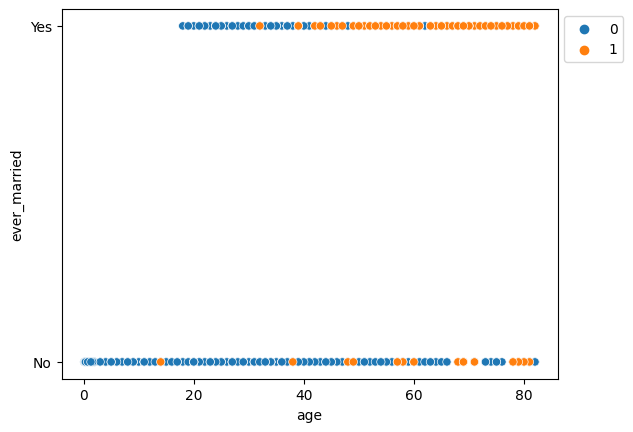

In [30]:
this_plot = sns.scatterplot(data=gdf_train,x='age',y='ever_married',hue='stroke') # Plot the fake data
this_plot.legend(loc= "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas
# looks like age goes not account for all of the strokes

In [31]:
## cleaning stroke var:

var = 'stroke'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right, notice
print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

Training Set:
count    3927.000000
mean        0.043545
std         0.204106
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64
Total Missings: 
 0 

Test Set:
count    981.000000
mean       0.038736
std        0.193063
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: stroke, dtype: float64
Total Missings: 
 0 



## Cleaned dataframes

In [32]:
gdf_train.head()
gdf_train.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000
mean,2578.873186,36900.512605,42.997576,0.093456,0.051184,105.134069,28.925032,0.043545
std,1471.705431,21002.680798,22.475913,0.291107,0.220401,44.162948,7.843391,0.204106
min,1.000000,84.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,1314.000000,18234.000000,25.000000,0.000000,0.000000,77.140000,23.600000,0.000000
50%,2575.000000,37446.000000,44.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,3854.500000,54983.500000,60.000000,0.000000,0.000000,113.245000,33.100000,0.000000
max,5110.000000,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [33]:
gdf_test.head()
gdf_test.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,2556.417941,37700.556575,42.353354,0.085627,0.042813,105.951233,28.772579,0.038736
std,1468.152800,20965.050908,22.878740,0.279955,0.202540,45.478624,7.900756,0.193063
min,23.000000,77.000000,0.160000,0.000000,0.000000,55.250000,11.500000,0.000000
25%,1201.000000,20162.000000,23.000000,0.000000,0.000000,76.630000,23.300000,0.000000
50%,2596.000000,38069.000000,44.000000,0.000000,0.000000,90.650000,27.900000,0.000000
75%,3837.000000,55744.000000,60.000000,0.000000,0.000000,114.610000,32.900000,0.000000
max,5109.000000,72861.000000,82.000000,1.000000,1.000000,263.560000,64.800000,1.000000


## Making X and y sets for models

We decided to exclude the 'id' and 'gender' variables from our models. The former was removed because the identifier should have no relationship to the event of a stroke and we removed the former because when calculating the percent differences initally to pick which variables to include, the gender did not seem to have much of a difference on the stroke likelihood.

In [34]:
## Getting dataframes ready for training and testing
from sklearn.preprocessing import PolynomialFeatures

# Train numeric variables
X_train_numeric = gdf_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
X_train_numeric = X_train_numeric.reset_index(drop=True)

# Exapanding numeric variables
X_train_numeric_lm = gdf_train.loc[:,['age','bmi','avg_glucose_level'] ]
X_train_numeric_lm = X_train_numeric_lm.reset_index(drop=True)
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric_lm) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous_train = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

# Train categorical variables
dummies_train = pd.concat([ pd.get_dummies(gdf_train['work_type'],dtype='int'), # work_type has more than two options
                      pd.get_dummies(gdf_train['Residence_type'],dtype='int',drop_first=True), # residence_type only has "Urban" or "Rural"
                      pd.get_dummies(gdf_train['smoking_status'],dtype='int'), # smoking_status has more than two options
                      pd.get_dummies(gdf_train['ever_married'],dtype='int',drop_first=True) # ever_married only has "Yes" or "No"
                    ],axis=1)
dummies_train = dummies_train.reset_index(drop=True)

# Concatinating numeric and one-hot-encoded categorical variables
X_train = pd.concat([X_train_numeric,dummies_train],axis=1)
X_train = X_train.reset_index(drop=True)

# Concatinating numeric and one-hot-encoded categorical variables
add_train = gdf_train.loc[:,['hypertension','heart_disease'] ]
add_train = add_train.reset_index(drop=True)
X_train2 = pd.concat([continuous_train,dummies_train,add_train],axis=1)
X_train2 = X_train2.reset_index(drop=True)

# Set up outcome
y_train = gdf_train['stroke']
# y_train = y_train.reset_index(drop=True)

In [35]:
# Test numeric variables
X_test_numeric = gdf_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
X_test_numeric = X_test_numeric.reset_index(drop=True)

# Exapanding numeric variables
X_test_numeric_lm = gdf_test.loc[:,['age','bmi','avg_glucose_level'] ]
X_test_numeric_lm = X_test_numeric_lm.reset_index(drop=True)
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric_lm) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous_test = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

# Test categorical variables
dummies_test = pd.concat([ pd.get_dummies(gdf_test['work_type'],dtype='int'),
                      pd.get_dummies(gdf_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(gdf_test['smoking_status'],dtype='int'),
                      pd.get_dummies(gdf_test['ever_married'],dtype='int',drop_first=True)],axis=1)
dummies_test = dummies_test.reset_index(drop=True)

# Concatinating numeric and one-hot-encoded categorical variables
X_test = pd.concat([X_test_numeric,dummies_test],axis=1)
X_test = X_test.reset_index(drop=True)

# Concatinating numeric and one-hot-encoded categorical variables
add_test = gdf_test.loc[:,['hypertension','heart_disease'] ] # to make the lm comparable to the other, we need to add the two exluded variables back in
add_test = add_test.reset_index(drop=True)
X_test2 = pd.concat([continuous_test,dummies_test,add_test],axis=1)
X_test2 = X_test2.reset_index(drop=True)

# Set up outcome
y_test = gdf_test['stroke']
# y_test = y_test.reset_index(drop=True)

## Results

We made three models for each of the following model types: linear, decision tree, and k-nearest neighbor. We decided to do this to see if the models would work better using only numerical data, only categorical data, or using a combination of the data. Below are the models and their respective R2 and RMSE values. Our data section describes why we decided to keep certain variables and not include others based on the cross tabs shown above. We also altered how we cleaned our data through looking at the different results of our model (R^2 and RMSE value) and comparing which results were better based on the cleaning style. Again, more on this information is in the data section.

## Linear Models

For the linear models, we found that if we used the polynomial expander on the variables that were numeric to begin with (exluding the boolean variables), the regressions fitted a bit better. We exanded to the 2nd degree, which is one degree under the amount of variables inputed, which could lead to a bit of overfitting, but we did not believe it was a large problem because the R2 and RMSE values only improved marginally.

In [36]:
## Linear Model using numeric data
from sklearn.linear_model import LinearRegression # Import linear regression model

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(continuous_train, y_train) # Fit the linear model
R2_lm_num = reg.score(continuous_test, y_test)
print('R2: ', R2_lm_num) # R squared measure
y_hat = reg.predict(continuous_test)
N = len(y_test)
RMSE_lm_num = (np.sum( (y_test - y_hat)**2)/N )**.5
print('RMSE: ', RMSE_lm_num )   # R squared measure

R2:  0.08291453479707223
RMSE:  0.18479216026517103


In [37]:
## Linear Model using categorical data

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(dummies_train, y_train) # Fit the linear model
R2_lm_cat = reg.score(dummies_test, y_test)
print('R2: ', R2_lm_cat) # R squared measure
y_hat = reg.predict(dummies_test)
N = len(y_test)
RMSE_lm_cat = (np.sum( (y_test - y_hat)**2)/N )**.5
print('RMSE: ', RMSE_lm_cat )   # R squared measure

R2:  0.01842541021015809
RMSE:  0.19117904634678345


In [38]:
## Linear Model using numeric and categorical data

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train2, y_train) # Fit the linear model
R2_lm = reg.score(X_test2, y_test)
print('R2: ', R2_lm) # R squared measure
y_hat = reg.predict(X_test2)
N = len(y_test)
RMSE_lm = (np.sum( (y_test - y_hat)**2)/N )**.5
print('RMSE: ', RMSE_lm )   # R squared measure

R2:  0.08350736729418795
RMSE:  0.18473242291682238


Out of the three linear models, the one that uses both the polynomial expanded numerical data and categorical data performed the best in R2 and RMSE metrics.

## Decision Tree Models

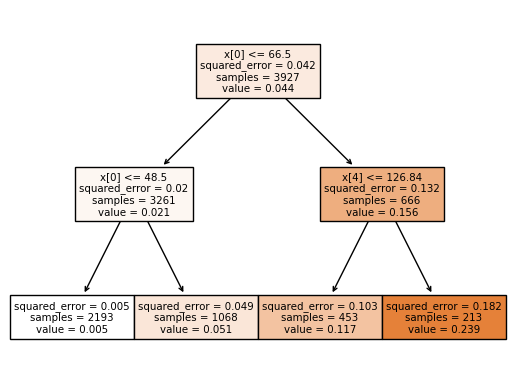

Coefficient of determination:  0.0640912449137303
RMSE:  0.18673692425553143


In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

## Decision Tree using numeric data
tree_model = tree.DecisionTreeRegressor(max_depth=2) # Set up the tree
cart = tree_model.fit(X_train_numeric, y_train) # Fit the tree
tree.plot_tree(cart,filled=True) # Visualize the tree
plt.show()

# Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test_numeric) # Run test data through model to get y predictions
N_test = len(y_test) # number of outputs
residuals_cart = y_test - y_hat_cart # difference between predicted and real values

# Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 ) # Sum of squared errors
MSE_cart = SSE_cart/N_test # Mean of sum of squarerd errors
RMSE_cart_num = (MSE_cart)**(1/2) # Root of mean of sum of squared errors
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart_num = 1 - SSE_cart/TSS # Coefficient of determination
print('Coefficient of determination: ', R2_cart_num) # R squared measure
print('RMSE: ', RMSE_cart_num)

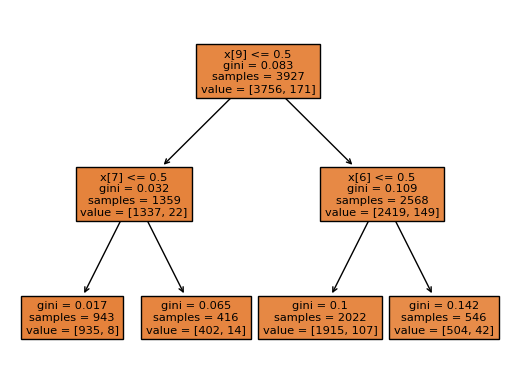

Coefficient of determination:  -0.0396512897492034
RMSE:  0.19681459216763408


In [40]:
## Decision Tree using categorical data
from sklearn.tree import DecisionTreeClassifier
tree_model = tree.DecisionTreeClassifier(max_depth=2) # Set up the tree
cart = tree_model.fit(dummies_train, y_train) # Fit the tree
tree.plot_tree(cart,filled=True) # Visualize the tree
plt.show()

# Make Predictions on the Test Set
y_hat_cart = cart.predict(dummies_test) # Run test data through model to get y predictions
N_test = len(y_test) # number of outputs
residuals_cart = y_test - y_hat_cart # difference between predicted and real values

# Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 ) # Sum of squared errors
MSE_cart = SSE_cart/N_test # Mean of sum of squarerd errors
RMSE_cart_cat = (MSE_cart)**(1/2) # Root of mean of sum of squared errors
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart_cat = 1 - SSE_cart/TSS # Coefficient of determination
print('Coefficient of determination: ', R2_cart_cat) # R squared measure
print('RMSE: ', RMSE_cart_cat)

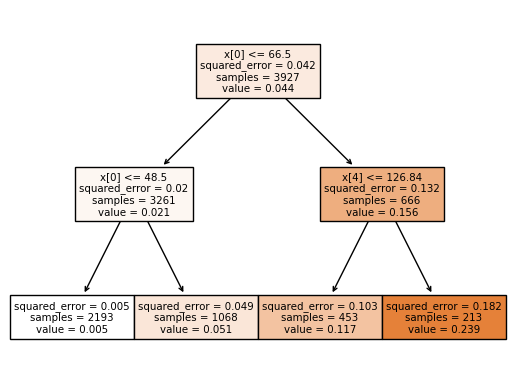

Coefficient of determination:  0.0640912449137303
RMSE:  0.18673692425553143


In [41]:
## Decision Tree using numeric and categorical data
tree_model = tree.DecisionTreeRegressor(max_depth=2) # Set up the tree
cart = tree_model.fit(X_train, y_train) # Fit the tree
tree.plot_tree(cart,filled=True) # Visualize the tree
plt.show()

# Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test) # Run test data through model to get y predictions
N_test = len(y_test) # number of outputs
residuals_cart = y_test - y_hat_cart # difference between predicted and real values

# Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 ) # Sum of squared errors
MSE_cart = SSE_cart/N_test # Mean of sum of squarerd errors
RMSE_cart = (MSE_cart)**(1/2) # Root of mean of sum of squared errors
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart = 1 - SSE_cart/TSS # Coefficient of determination
print('Coefficient of determination: ', R2_cart) # R squared measure
print('RMSE: ', RMSE_cart)

The decision trees that included any numerical data were created using regression trees, and the decision tree that only used categorical data was made using a classifier tree. For all three models, we found that increasing the depth beyond 2 did not help them perform better. This is concerning because at this point, very few variables are being included in the predictions and likely mean the models are not great. Additionally, it is important to note that the categorical tree has a negative R2 value, meaning random chance would perform better than it. This was pretty surprising, and when the model is switched to regression, it actually had a positive value, but we were thought it would be better to show the categorical data with the classifier. Out of the three created, the trees that used numeric data performed identically because the variables that created the splits were numeric. This was unsuprising given that age and glucose level were the most indicative of stroke.

## K Nearest Neighbor Models

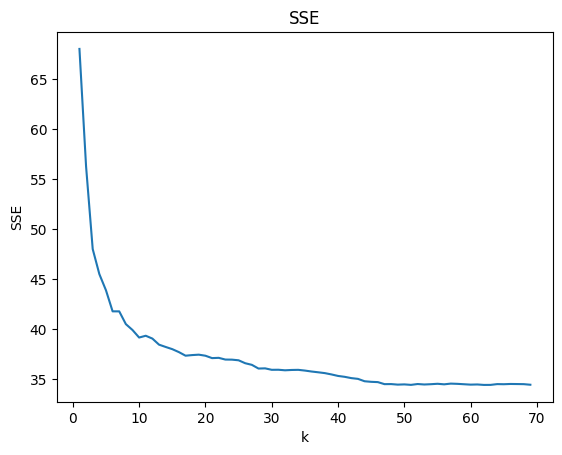

In [42]:
## KNeighborsRegressor Model using numerical data
from sklearn.neighbors import KNeighborsRegressor

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_train_numeric.apply(maxmin)
X_test_knn = X_test_numeric.apply(maxmin)

# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

In [43]:
# Fit optimal model:
knn_model = KNeighborsRegressor(n_neighbors=max(6,k_star))
knn_star = knn_model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn

# Calculate RMSE and R^2
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
N_test = len(y_test)
MSE_knn = SSE_knn/N_test
RMSE_knn_num = (SSE_knn/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_knn_num = 1 - SSE_knn/TSS
print(f'RMSE: {RMSE_knn_num:.2f}')
print(f'R^2: {R2_knn_num:.2f}')

RMSE: 0.19
R^2: 0.06


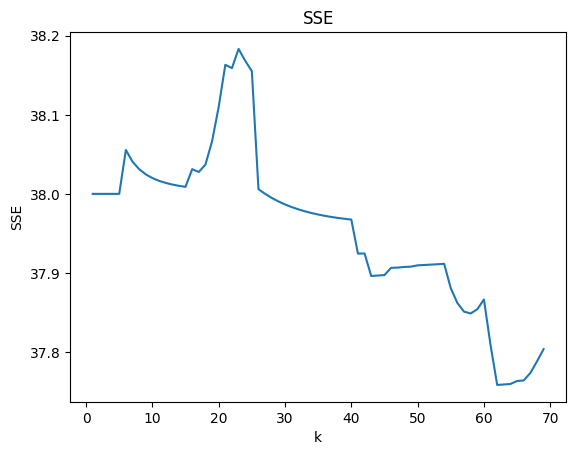

In [44]:
## KNeighborsRegressor Model using categorical data
from sklearn.neighbors import KNeighborsRegressor

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = dummies_train.apply(maxmin)
X_test_knn = dummies_test.apply(maxmin)

# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

As seen above, the kNN does not work well with the categorical data.

In [45]:
# Fit optimal model:
knn_model = KNeighborsRegressor(n_neighbors=max(6,k_star))
knn_star = knn_model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn

# Calculate RMSE and R^2
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
N_test = len(y_test)
MSE_knn = SSE_knn/N_test
RMSE_knn_cat = (SSE_knn/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_knn_cat = 1 - SSE_knn/TSS
print(f'RMSE: {RMSE_knn_cat:.2f}')
print(f'R^2: {R2_knn_cat:.2f}')

RMSE: 0.20
R^2: -0.03


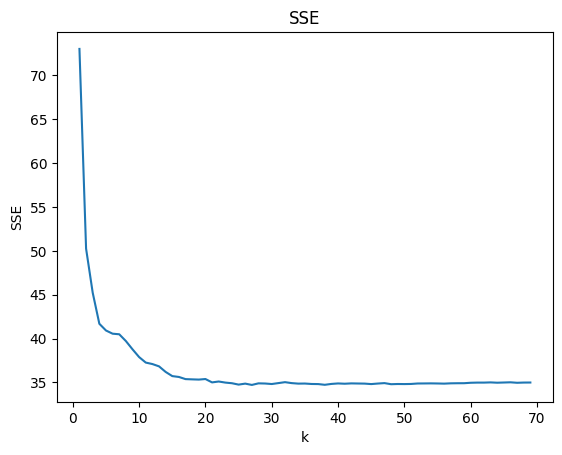

In [46]:
## KNeighborsRegressor Model using numerical and categorical data
from sklearn.neighbors import KNeighborsRegressor

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_train.apply(maxmin)
X_test_knn = X_test.apply(maxmin)

# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

In [47]:
# Fit optimal model:
knn_model = KNeighborsRegressor(n_neighbors=max(6,k_star))
knn_star = knn_model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn

# Calculate RMSE and R^2
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
N_test = len(y_test)
MSE_knn = SSE_knn/N_test
RMSE_knn = (SSE_knn/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_knn = 1 - SSE_knn/TSS
print(f'RMSE: {RMSE_knn:.2f}')
print(f'R^2: {R2_knn:.2f}')

RMSE: 0.19
R^2: 0.05


Though the purely numeric kNN model has a slightly better R-squared value, we choose the model that uses both numeric and categorical data as our better kNN model as it has a lower RMSE.

Below we have made a comparison table of the best performing model out of each type we experimented with.

In [48]:
## Comparison Table of Best Performing Model of Each Model Type:
gdf = pd.DataFrame({'RMSE':[RMSE_lm,RMSE_cart,RMSE_knn_num],
                    'R2':[R2_lm,R2_cart,R2_knn_num]})
gdf.index = ['LM','TREE','KNN']
gdf.head()

,RMSE,R2
LM,0.184732,0.083507
TREE,0.186737,0.064091
KNN,0.187330,0.058142


We found that the linear model which used both the numerical and categorical data performed the best out of all of our attempts. The linear model had a RMSE value of 0.185 and a R-squared value of 0.084. Though all of the models we were able to create have pretty poor R-squared values, we believed the decreased RMSE was more valuable as it is more indicative of the accuracy of the model rather than the predictive power. We tried many different ways of creating the models (as seen with the commented-out polynomial exapander code chunks above) and switched out the data we decided to include, however we ran into trouble with getting models that traded off a lower RMSE for a higher R2 value, so we settled on submitting the ones shown above.

Overall, we do not believe our strategy worked well due to the very low R2 values and the RMSE that is barely better than the original simple linear regression. We think our strategy may have been flawed due to not using the all of the variables (like gender) or because of the oposite problem - we included ones that were misleading to the model, as they did not have clear cut-off points for when a stroke was likely to occur. Also, we may have needed to perform some filtering on the data before training the models, such as specifiying that if the person was below a certain age, then a stroke event should not be predicted, etc.

## Conclusion

In conclusion, we found that the linear model which used both the numerical and categorical data performed the best out of all of our attempts. Through utilizing data from "training_data.csv" to build models, with evaluation based on the provided "testing_data.csv" we were able compute the R^2 values and RMSE values with different types of models. We had goals of a low RMSE value as a low RMSE indicates that the model's predictions are, on average, close to the actual values meaning it has better predictive accuracy and is performing well in terms of minimizing the differences between predicted and observed values. We wanted a high R^2 value, close to 1, as it suggests that the model is effective in explaining and predicting the variability in the dependent variable. Our goal was to beat the given R^2 value of .087 determined from a simple linear model, through getting a higher value, and also (and more importantly) beat the RMSE value of .206 from a simple linear model through getting a smaller value. 

The first parts of the analysis involved cleaning and wrangling various variables, such as 'smoking_status,' 'id,' 'Residence_type,' 'work_type,' 'age,' 'avg_glucose_level,' 'bmi,' 'heart_disease,' 'hypertension,' 'ever_married,' 'gender,' and 'stroke.' The cleaning process included handling missing values, exploring distributions, and identifying potential correlations with strokes. Key findings included the significance of factors like 'smoking_status,' 'work_type,' 'Residence_type,' 'age,' 'avg_glucose_level,' 'bmi,' 'heart_disease,' 'hypertension,' and 'ever_married' in predicting strokes. However, 'gender' (and 'id') did not show a clear association with strokes and was excluded from the models. The cleaning and analysis aimed at ensuring uniformity across datasets and optimizing the features for predictive modeling through running the models many times with different ways of cleaning variables.

We found that the linear model which used both the numerical and categorical data performed the best out of all of our attempts. The linear model had a RMSE value of 0.185 and a R-squared value of 0.084. Our RMSE value was .019 better than the previous calculated RMSE value. Though all of the models we were able to create have pretty poor R-squared values, we believed the decreased and improved RMSE was more valuable as it is more indicative of the accuracy of the model rather than the predictive power. The RMSE focuses on key important factors such as prediction accuracy (especially crucial when the primary goal is to make accurate predictions), sensitive to outliers (lower RMSE is better at handling extreme values which is important as outliers can have a significant impact on the model's performance), and focusing on residuals (minimizing these differences is crucial for improving the overall accuracy of the model). All these factors are  particularly meaningful if the primary goal is to obtain precise predictions rather than to explain the variability in the dependent variable (which is what R^2 does). It's a recognition that, despite the limited explanatory power of the model, it is providing more accurate predictions, which could be more valuable in practical applications. Overall, we were able to get a lower RMSE score than the previous model through cleaning, analyzing, creating many models, and calculations. 

If we were to redo this assignment, we would use many of the strategies presented in recent classes such as resampling the data and using confidence intervals to better inform our splits in the decision trees. Also we would likely use ensembles to make a decision forest that we could average together to get a better prediction.